In [2]:
import numpy as np
import matplotlib.pyplot as plt
import os
import tensorflow as tf
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.layers import Dense, Input, Dropout, Flatten, Conv2D
from tensorflow.keras.layers import BatchNormalization, Activation, MaxPooling2D
from tensorflow.keras.models import Sequential
from tensorflow.keras.optimizers import Adam
import pandas as pd

In [3]:
# Load the CSV file
file_path = 'chic Dataset/train_data.csv'
train_data = pd.read_csv(file_path)

# Print the first few rows of the dataframe
print(train_data.head())
print(train_data['label'].unique())

           images               label
0  salmo.1558.jpg          Salmonella
1  cocci.1866.jpg         Coccidiosis
2   cocci.171.jpg         Coccidiosis
3  salmo.1484.jpg          Salmonella
4     ncd.100.jpg  New Castle Disease
['Salmonella' 'Coccidiosis' 'New Castle Disease' 'Healthy']


In [4]:
train_folder = "chic Dataset/Train"
for types in os.listdir(train_folder):
    print(f"{len(os.listdir(os.path.join(train_folder, types)))} {types} images")

2477 Coccidiosis images
2405 Healthy images
563 New Castle Disease images
2626 Salmonella images


In [5]:
# Dataset images can be loaded using ImageDataGenerator function
img_size = 48
batch_size = 32  # Start with a smaller batch size

datagen_train = ImageDataGenerator(horizontal_flip=True, validation_split=0.2)

train_generator = datagen_train.flow_from_directory(
    train_folder,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='training'
)

validation_generator = datagen_train.flow_from_directory(
    train_folder,
    target_size=(img_size, img_size),
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=True,
    subset='validation'
)


Found 6455 images belonging to 4 classes.
Found 1612 images belonging to 4 classes.


In [6]:
detection = Sequential()

# 1 - Convolutional layer-1
detection.add(Conv2D(64, (3, 3), padding='same', input_shape=(img_size, img_size, 3)))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# 2 - Convolutional layer-2
detection.add(Conv2D(128, (5, 5), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# 3 - Convolutional layer-3
detection.add(Conv2D(512, (3, 3), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

# 4 - Convolutional layer-4
detection.add(Conv2D(1024, (3, 3), padding='same'))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(MaxPooling2D(pool_size=(2, 2)))
detection.add(Dropout(0.25))

detection.add(Flatten())
detection.add(Dense(256))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

detection.add(Dense(512))
detection.add(BatchNormalization())
detection.add(Activation('relu'))
detection.add(Dropout(0.25))

# Output layer with 4 classes
detection.add(Dense(4, activation='softmax'))

c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\layers\convolutional\base_conv.py:107: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


In [8]:
optimum = Adam(learning_rate=0.0005)
detection.compile(optimizer=optimum, loss='categorical_crossentropy', metrics=['accuracy'])
detection.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv2d (Conv2D)                 │ (None, 48, 48, 64)     │         1,792 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 48, 48, 64)     │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation (Activation)         │ (None, 48, 48, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d (MaxPooling2D)    │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 24, 24, 64)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_1 (Conv2D)               │ (None, 24, 24, 128)    │       204,928 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 24, 24, 128)    │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_1 (Activation)       │ (None, 24, 24, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_1 (MaxPooling2D)  │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 12, 12, 128)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_2 (Conv2D)               │ (None, 12, 12, 512)    │       590,336 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 12, 12, 512)    │         2,048 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_2 (Activation)       │ (None, 12, 12, 512)    │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_2 (MaxPooling2D)  │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 6, 6, 512)      │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv2d_3 (Conv2D)               │ (None, 6, 6, 1024)     │     4,719,616 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 6, 6, 1024)     │         4,096 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ activation_3 (Activation)       │ (None, 6, 6, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling2d_3 (MaxPooling2D)  │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_3 (Dropout)             │ (None, 3, 3, 1024)     │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 9216)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     2,359,552 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,02

 Total params: 8,019,844 (30.59 MB)

 Trainable params: 8,014,852 (30.57 MB)

 Non-trainable params: 4,992 (19.50 KB)

In [9]:
epochs = 30
steps_per_epoch = train_generator.samples // batch_size
validation_steps = validation_generator.samples // batch_size

detection.fit(
    x=train_generator,
    steps_per_epoch=steps_per_epoch,
    epochs=epochs,
    validation_data=validation_generator,
    validation_steps=validation_steps
)

Epoch 1/30


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\site-packages\keras\src\trainers\data_adapters\py_dataset_adapter.py:121: UserWarning: Your `PyDataset` class should call `super().__init__(**kwargs)` in its constructor. `**kwargs` can include `workers`, `use_multiprocessing`, `max_queue_size`. Do not pass these arguments to `fit()`, as they will be ignored.
  self._warn_if_super_not_called()


201/201 ━━━━━━━━━━━━━━━━━━━━ 46s 212ms/step - accuracy: 0.7230 - loss: 0.7638 - val_accuracy: 0.6212 - val_loss: 1.8458
Epoch 2/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 263us/step - accuracy: 0.7812 - loss: 0.3983 - val_accuracy: 0.8333 - val_loss: 0.4882
Epoch 3/30


c:\Users\User\AppData\Local\Programs\Python\Python311\Lib\contextlib.py:155: UserWarning: Your input ran out of data; interrupting training. Make sure that your dataset or generator can generate at least `steps_per_epoch * epochs` batches. You may need to use the `.repeat()` function when building your dataset.
  self.gen.throw(typ, value, traceback)


201/201 ━━━━━━━━━━━━━━━━━━━━ 42s 208ms/step - accuracy: 0.8433 - loss: 0.4384 - val_accuracy: 0.5769 - val_loss: 2.4318
Epoch 4/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 202us/step - accuracy: 0.8438 - loss: 0.4613 - val_accuracy: 0.5833 - val_loss: 2.2745
Epoch 5/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 43s 212ms/step - accuracy: 0.8780 - loss: 0.3514 - val_accuracy: 0.6700 - val_loss: 0.9407
Epoch 6/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 204us/step - accuracy: 0.9062 - loss: 0.4385 - val_accuracy: 0.5000 - val_loss: 1.3774
Epoch 7/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 90s 449ms/step - accuracy: 0.8798 - loss: 0.3323 - val_accuracy: 0.6156 - val_loss: 1.4393
Epoch 8/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 1s 545us/step - accuracy: 0.8438 - loss: 0.3229 - val_accuracy: 0.5000 - val_loss: 1.8981
Epoch 9/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 72s 353ms/step - accuracy: 0.8925 - loss: 0.2938 - val_accuracy: 0.7237 - val_loss: 0.8577
Epoch 10/30
201/201 ━━━━━━━━━━━━━━━━━━━━ 0s 178us/step - accuracy: 0.9688 - loss: 0.1233 - val_ac

In [10]:
detection.save('ChickenDiseaseModel.h5')

1/1 ━━━━━━━━━━━━━━━━━━━━ 0s 18ms/step
Salmonella


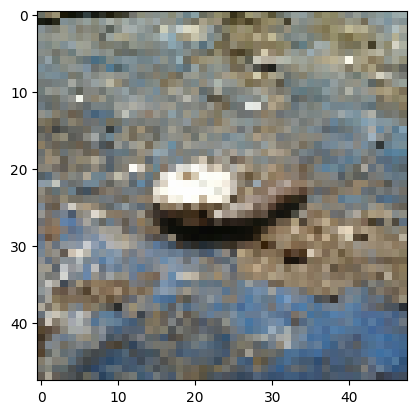

In [12]:
from tensorflow.keras.preprocessing import image

test_img = image.load_img("salmo.1312.jpg", target_size=(img_size, img_size))
plt.imshow(test_img)
test_img = image.img_to_array(test_img)
test_img = np.expand_dims(test_img, axis=0)
result = detection.predict(test_img)
a = result.argmax()

classes = train_generator.class_indices
category = list(classes.keys())

output = category[a]
print(output)

Evaluate the model

In [13]:

train_loss, train_accuracy = detection.evaluate(train_generator, steps=steps_per_epoch)
print(f'Training Accuracy: {train_accuracy * 100:.2f}%')


validation_loss, validation_accuracy = detection.evaluate(validation_generator, steps=validation_steps)
print(f'Validation Accuracy: {validation_accuracy * 100:.2f}%')


201/201 ━━━━━━━━━━━━━━━━━━━━ 10s 49ms/step - accuracy: 0.8201 - loss: 0.6531
Training Accuracy: 81.89%
50/50 ━━━━━━━━━━━━━━━━━━━━ 2s 49ms/step - accuracy: 0.7613 - loss: 0.8652
Validation Accuracy: 75.56%
